In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import math
from sklearn import metrics

Ładowanie i zapoznawanie się z danymi

In [2]:
data = pd.read_csv("validate.csv", low_memory=False)
data.head()

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,42083,0x10c95,CUS_0x61c2,April,Aradhana Aravindanw,23,008-17-0608,Lawyer,88752.26,7109.021667,...,Good,1180.26,36.713885,18 Years and 5 Months,No,72.524443,627.5721756392708,!@9#%8,290.8055480188755,Standard
1,71825,0x1badb,CUS_0x84a8,February,Kanekoe,5419,819-24-5756,Mechanic,87745.92,NaN,...,Good,207.0,36.121435,20 Years and 5 Months,NM,0.000000,366.7904443824298,Low_spent_Small_value_payments,639.8255556175702,Good
2,99535,0x25d35,CUS_0x85dd,August,Lucianam,45,767-36-7303,_______,8974.555,783.879583,...,_,1660.14,33.883240,16 Years and 10 Months,Yes,30.443262,57.441335697106105,Low_spent_Small_value_payments,280.50336019683317,Standard
3,47879,0x12e89,CUS_0x6172,August,Lefteris Papadimasd,32,794-09-7808,Manager,17091.96,1182.330000,...,Bad,4047.31,40.077930,8 Years and 5 Months,Yes,54.857946,__10000__,Low_spent_Small_value_payments,282.35488387401983,Poor
4,36734,0xed3c,CUS_0x253c,July,NaN,34,399-03-5425,Developer,49128.9,4231.075000,...,Standard,2574.1,29.415814,14 Years and 4 Months,Yes,169.529221,94.40828486614019,High_spent_Large_value_payments,399.1699940518158,Poor


In [3]:
data.Credit_Score.unique() 

array(['Standard', 'Good', 'Poor'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                20000 non-null  int64  
 1   ID                        20000 non-null  object 
 2   Customer_ID               20000 non-null  object 
 3   Month                     20000 non-null  object 
 4   Name                      18013 non-null  object 
 5   Age                       20000 non-null  object 
 6   SSN                       20000 non-null  object 
 7   Occupation                20000 non-null  object 
 8   Annual_Income             20000 non-null  object 
 9   Monthly_Inhand_Salary     16966 non-null  float64
 10  Num_Bank_Accounts         20000 non-null  int64  
 11  Num_Credit_Card           20000 non-null  int64  
 12  Interest_Rate             20000 non-null  int64  
 13  Num_of_Loan               20000 non-null  object 
 14  Type_o

In [5]:
data.shape

(20000, 29)

Podział zbioru

In [ ]:
# y = pd.Series(data['Credit_Score'])
# X = data.drop(['Credit_Score'],axis=1)
# # Train - budowa, test - zbior testowy dla budowy, val - zbiór dla validacji
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=123
# )
# X_train, X_test, y_train, y_test = train_test_split(
#      X_train, y_train, test_size=0.2, random_state=123
# )

Usuwanie kolumn i czyszczenie zbioru

In [7]:
def create_df(X,y):
  return X.join(y)

def drop_columns(df):
  drop_cols = ['ID','Name','SSN']
  df_dropped = df.drop(drop_cols , axis=1)
  return df_dropped

<span style="color: red"> Usuwanie zbyt dużej ilości kolumn zostało poprawione</span> 

In [9]:
Train_dropped = drop_columns(data)

In [10]:
for i in Train_dropped:
  print('\n',i,Train_dropped[i].unique())


 Unnamed: 0 [42083 71825 99535 ... 35031 42195 50824]

 Customer_ID ['CUS_0x61c2' 'CUS_0x84a8' 'CUS_0x85dd' ... 'CUS_0x5c72' 'CUS_0x2bec'
 'CUS_0x9576']

 Month ['April' 'February' 'August' 'July' 'May' 'March' 'January' 'June']

 Age ['23' '5419' '45' '32' '34' '40' '20' '41' '24' '46' '44' '26' '29' '52'
 '31' '39' '38' '37' '19' '17' '35' '37_' '32_' '55_' '18' '54' '51' '15'
 '42' '25' '28' '16' '18_' '39_' '21' '33' '47' '44_' '55' '29_' '36' '30'
 '43' '49' '22' '50' '27' '36_' '48' '-500' '38_' '20_' '14' '19_' '1459'
 '46_' '33_' '28_' '50_' '25_' '41_' '53' '51_' '31_' '52_' '2512' '4301_'
 '2109' '26_' '21_' '4041' '1644' '6423' '27_' '35_' '54_' '15_' '34_'
 '17_' '56' '47_' '48_' '30_' '8005' '1083' '14_' '43_' '7746' '4155'
 '16_' '2650' '6121' '8450' '7133' '5509' '42_' '49_' '5902' '8049' '40_'
 '4775' '6341' '395' '6360' '4774' '701' '3607' '22_' '6381_' '3353'
 '5027' '7065' '2318' '532' '53_' '1265' '316' '2778' '995' '45_' '5981'
 '1808' '4422' '7099' '2540' '3085' 

In [11]:
def clean_records(df):
  clean = df.copy()
  pattern = "\\`*_{}[]()>#@+!$:;%"
  num_columns = ['Age', 'Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
           'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Num_Credit_Inquiries']
  str_columns = ['Month','Occupation','Credit_History_Age','Payment_of_Min_Amount', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']
  for i in num_columns:
    for c in pattern:
      clean[i] = clean[i].astype(str).str.replace(c,'')

  for i in str_columns:
    for c in pattern:
      clean[i] = clean[i].replace(c,'')
  return clean


In [12]:
Train_clean_records = clean_records(Train_dropped)
Train_clean_records.head()

C:\Users\tymek\AppData\Local\Temp\ipykernel_15192\1508392769.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,42083,CUS_0x61c2,April,23,Lawyer,88752.26,7109.0216666666665,5,6,3,...,Good,1180.26,36.713885335936375,18 Years and 5 Months,No,72.52444300852066,627.5721756392708,!@9#%8,290.8055480188755,Standard
1,71825,CUS_0x84a8,February,5419,Mechanic,87745.92,nan,0,1,2,...,Good,207.0,36.12143540230503,20 Years and 5 Months,NM,0.0,366.7904443824298,Low_spent_Small_value_payments,639.8255556175702,Good
2,99535,CUS_0x85dd,August,45,_______,8974.555,783.8795833333335,10,8,28,...,,1660.14,33.88323959434667,16 Years and 10 Months,Yes,30.443262439394022,57.441335697106105,Low_spent_Small_value_payments,280.50336019683317,Standard
3,47879,CUS_0x6172,August,32,Manager,17091.96,1182.33,10,8,23,...,Bad,4047.31,40.077930390412384,8 Years and 5 Months,Yes,54.857945863955706,10000,Low_spent_Small_value_payments,282.35488387401983,Poor
4,36734,CUS_0x253c,July,34,Developer,49128.9,4231.074999999999,8,3,29,...,Standard,2574.1,29.415814109640923,14 Years and 4 Months,Yes,169.5292210820439,94.40828486614019,High_spent_Large_value_payments,399.1699940518158,Poor


In [13]:
def Credit_History_Age_trasform(df):
  CHA_transform = df.copy()
  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(str).str.replace('Months','')

  for i in CHA_transform.Credit_History_Age.index:
    if CHA_transform.Credit_History_Age[i][-3] == ".":
       CHA_transform.Credit_History_Age[i] = str(CHA_transform.Credit_History_Age[i]).replace(".", ".0")

  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(float)
  CHA_transform['Credit_History_Age'] = (CHA_transform['Credit_History_Age'] % 1 * 100 + CHA_transform['Credit_History_Age'] // 1) * 12
  return CHA_transform

In [14]:
Train_CHA_transformed = Credit_History_Age_trasform(Train_clean_records)
Train_CHA_transformed.Credit_History_Age

C:\Users\tymek\AppData\Local\Temp\ipykernel_15192\1636290082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CHA_transform.Credit_History_Age[i] = str(CHA_transform.Credit_History_Age[i]).replace(".", ".0")


0        276.0
1        300.0
2        312.0
3        156.0
4        216.0
         ...  
19995    348.0
19996    180.0
19997    276.0
19998    312.0
19999    216.0
Name: Credit_History_Age, Length: 20000, dtype: float64

<AxesSubplot:>

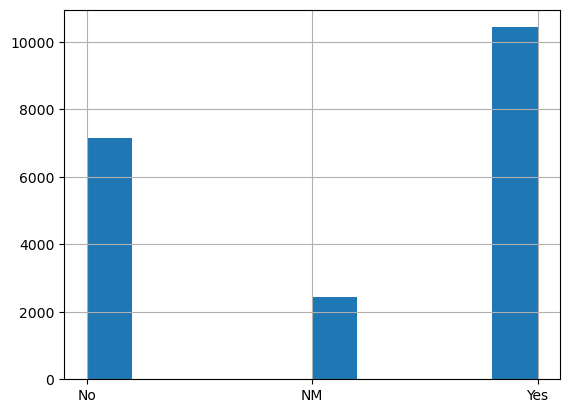

In [15]:
Train_CHA_transformed.Payment_of_Min_Amount.hist()

Kodowanie kolumn

In [17]:
def colums_encoding(df):

    df["Payment_Behaviour"] = df["Payment_Behaviour"].replace('!@9#%8', 'Unknown_spent_Unknown_value_payments')
    split_payment = lambda x:  ([x.split("_")[0], x.split("_")[2]] if (x is not None) else ["Unknown", "Unknown"])
    df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(split_payment)
    df[["Spending_Behaviour", "Value_Payments"]] = pd.DataFrame(df["Payment_Behaviour"].tolist(), index=df.index)
    spending_dict = {'Low':0, 'High':1, 'Unknown':float('nan')}
    value_dict = {'Small':0, 'Medium':1, 'Large':2,  'Unknown':float('nan')}
    df['Spending_Behaviour'] = df['Spending_Behaviour'].map(spending_dict)
    df['Value_Payments'] = df['Value_Payments'].map(value_dict)
    del df["Payment_Behaviour"]

    dict_target={'Poor': "0", 
          "Standard":"1", 
          "Good":"2"}
    df.Credit_Score = df.Credit_Score.map(dict_target).astype(float)

    df = pd.get_dummies(df, prefix='Minimal', columns=['Payment_of_Min_Amount'], drop_first=False)
    return df

<span style='color: red'> Uwagi zespołu walidacyjnego dotyczące funkcji columns_encoding zostały wysłuchane</span>

In [19]:
Train_encoded = colums_encoding(Train_CHA_transformed)
Train_encoded.head()

,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Behaviour,Value_Payments,Minimal_NM,Minimal_No,Minimal_Yes
0,42083,CUS_0x61c2,April,23,Lawyer,88752.26,7109.0216666666665,5,6,3,...,276.0,72.52444300852066,627.5721756392708,290.8055480188755,1.0,NaN,NaN,0,1,0
1,71825,CUS_0x84a8,February,5419,Mechanic,87745.92,nan,0,1,2,...,300.0,0.0,366.7904443824298,639.8255556175702,2.0,0.0,0.0,1,0,0
2,99535,CUS_0x85dd,August,45,_______,8974.555,783.8795833333335,10,8,28,...,312.0,30.443262439394022,57.441335697106105,280.50336019683317,1.0,0.0,0.0,0,0,1
3,47879,CUS_0x6172,August,32,Manager,17091.96,1182.33,10,8,23,...,156.0,54.857945863955706,10000,282.35488387401983,0.0,0.0,0.0,0,0,1
4,36734,CUS_0x253c,July,34,Developer,49128.9,4231.074999999999,8,3,29,...,216.0,169.5292210820439,94.40828486614019,399.1699940518158,0.0,1.0,2.0,0,0,1


In [20]:
Train_encoded.dtypes

Unnamed: 0                    int64
Customer_ID                  object
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary        object
Num_Bank_Accounts            object
Num_Credit_Card              object
Interest_Rate                object
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date          object
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries         object
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio     object
Credit_History_Age          float64
Total_EMI_per_month          object
Amount_invested_monthly      object
Monthly_Balance              object
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                  

In [21]:
def encoding_to_num(df):
  df_encoding_int = df.copy()
  columns = ['Age', 'Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
             'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
             'Interest_Rate', 'Num_of_Loan', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', "Changed_Credit_Limit", "Num_Credit_Inquiries"]
  df_encoding_int.Changed_Credit_Limit = [str(i or np.NaN) for i in df_encoding_int.Changed_Credit_Limit]
  for i in columns:
    df_encoding_int[i] = df_encoding_int[i].astype(float)

  
  return df_encoding_int

In [22]:
Train_encoded_int = encoding_to_num(Train_encoded)
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace('and ','')
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace(' Loan','')
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace('nan','nany')
Train_encoded_int.dtypes

Unnamed: 0                    int64
Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                  

In [23]:
def encoding_columns_2(df):
  df_drop = df.copy()
  dict_target={'Bad': 0, 
          "Standard":1, 
          "Good":2,
          "":float('nan')}
  df_drop.Credit_Mix = df_drop.Credit_Mix.map(dict_target).astype(float)


  dict_target={'January': 1, 
          "February":2, 
          "March":3,
          "April":4,
          "May":5,
          "June":6,
          "July":7,
          "August":8,
          "September":9,
          "October":10,
          "November":11,
          "December":12}


  df_drop.Month = df_drop.Month.map(dict_target).astype(float)
  sin_values = [math.sin((2*math.pi*x)/12) for x in list(df_drop.Month)]
  cos_values = [math.cos((2*math.pi*x)/12) for x in list(df_drop.Month)]
  df_drop = df_drop.assign(Month_sin = sin_values, Month_cos = cos_values)
  df_drop = df_drop.drop("Month", axis = 1)


  
  text = ""
  for i in Train_encoded_int.Type_of_Loan:
    text = text + i + ","
  
  texting = list(text.split(","))
  for i in range(len(texting)):
    texting[i] = texting[i].strip()
  texting = list(set(texting))
  try:
    texting.remove('')
  except ValueError:
    pass
  
  try:
    texting.remove('nany')
  except ValueError:
    pass
  
  for i in texting:
    x = []
    for j in df_drop.Type_of_Loan:
      x.append(str(j).count(i))
    df_drop[i] = x
  
  df_drop = df_drop.drop("Type_of_Loan", axis = 1)


  return df_drop

In [24]:
Train_dropped = dropping2(Train_encoded_int)

NameError: name 'dropping2' is not defined

<span style='color: red'>powinno być encoding_columns_2 a nie dropping 2</span>

In [25]:
Train_dropped = encoding_columns_2(Train_encoded_int)

In [26]:
Train_dropped.Occupation.value_counts()

Lawyer           1396
_______          1383
Engineer         1294
Mechanic         1279
Entrepreneur     1276
Teacher          1272
Accountant       1249
Scientist        1248
Doctor           1247
Manager          1234
Architect        1233
Media_Manager    1217
Developer        1202
Musician         1182
Journalist       1170
Writer           1118
Name: Occupation, dtype: int64

In [27]:
def occupation_agg(df):
  df_agg = df.copy()
  df_agg['Occupation'] = df_agg['Occupation'].astype(str).str.replace('_______','Other')
  df_agg = pd.get_dummies(df_agg, prefix='Occupation', columns=['Occupation'], drop_first=False)
  df_agg = df_agg.drop_duplicates()
  return df_agg

In [28]:
Train_occ_agg = occupation_agg(Train_dropped)
Train_occ_agg.dtypes

Unnamed: 0                    int64
Customer_ID                  object
Age                         float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                    uint8
Minimal_Yes                   uint8
Month_sin                   float64
Month_cos                   

In [29]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

Zamiana nulli

In [32]:
Train_swaped = swap_columns(Train_occ_agg, 'Credit_Score', 'Occupation_Writer')
Train_swaped.isnull().sum()

Unnamed: 0                     0
Customer_ID                    0
Age                            0
Annual_Income                  0
Monthly_Inhand_Salary       3034
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      1418
Changed_Credit_Limit         417
Num_Credit_Inquiries         371
Credit_Mix                  4021
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1747
Total_EMI_per_month            0
Amount_invested_monthly      863
Monthly_Balance              241
Occupation_Writer              0
Spending_Behaviour          1449
Value_Payments              1449
Minimal_NM                     0
Minimal_No                     0
Minimal_Yes                    0
Month_sin                      0
Month_cos                      0
Credit-Builder                 0
Debt Consolidation             0
Student   

<span style='color: red'>W jakim celu zamieniana jest kolumna credit_score i occupation_writer?</span>

In [33]:
def fill_missing_values(df):
  df_na = df.copy()

  
  cols = list(df_na.columns.values)
  cols.remove('Customer_ID')
  cols.remove('Credit_Score')
  for i in cols:
    df_na[i] = df_na[i].fillna(df_na.groupby('Customer_ID')[i].transform("median"))
    df_na[i].fillna(Train_swaped[i].median(), inplace = True)
  df_na = df_na.drop("Customer_ID", axis = 1)

  
  return df_na

Korelacje i outliery

<AxesSubplot:>

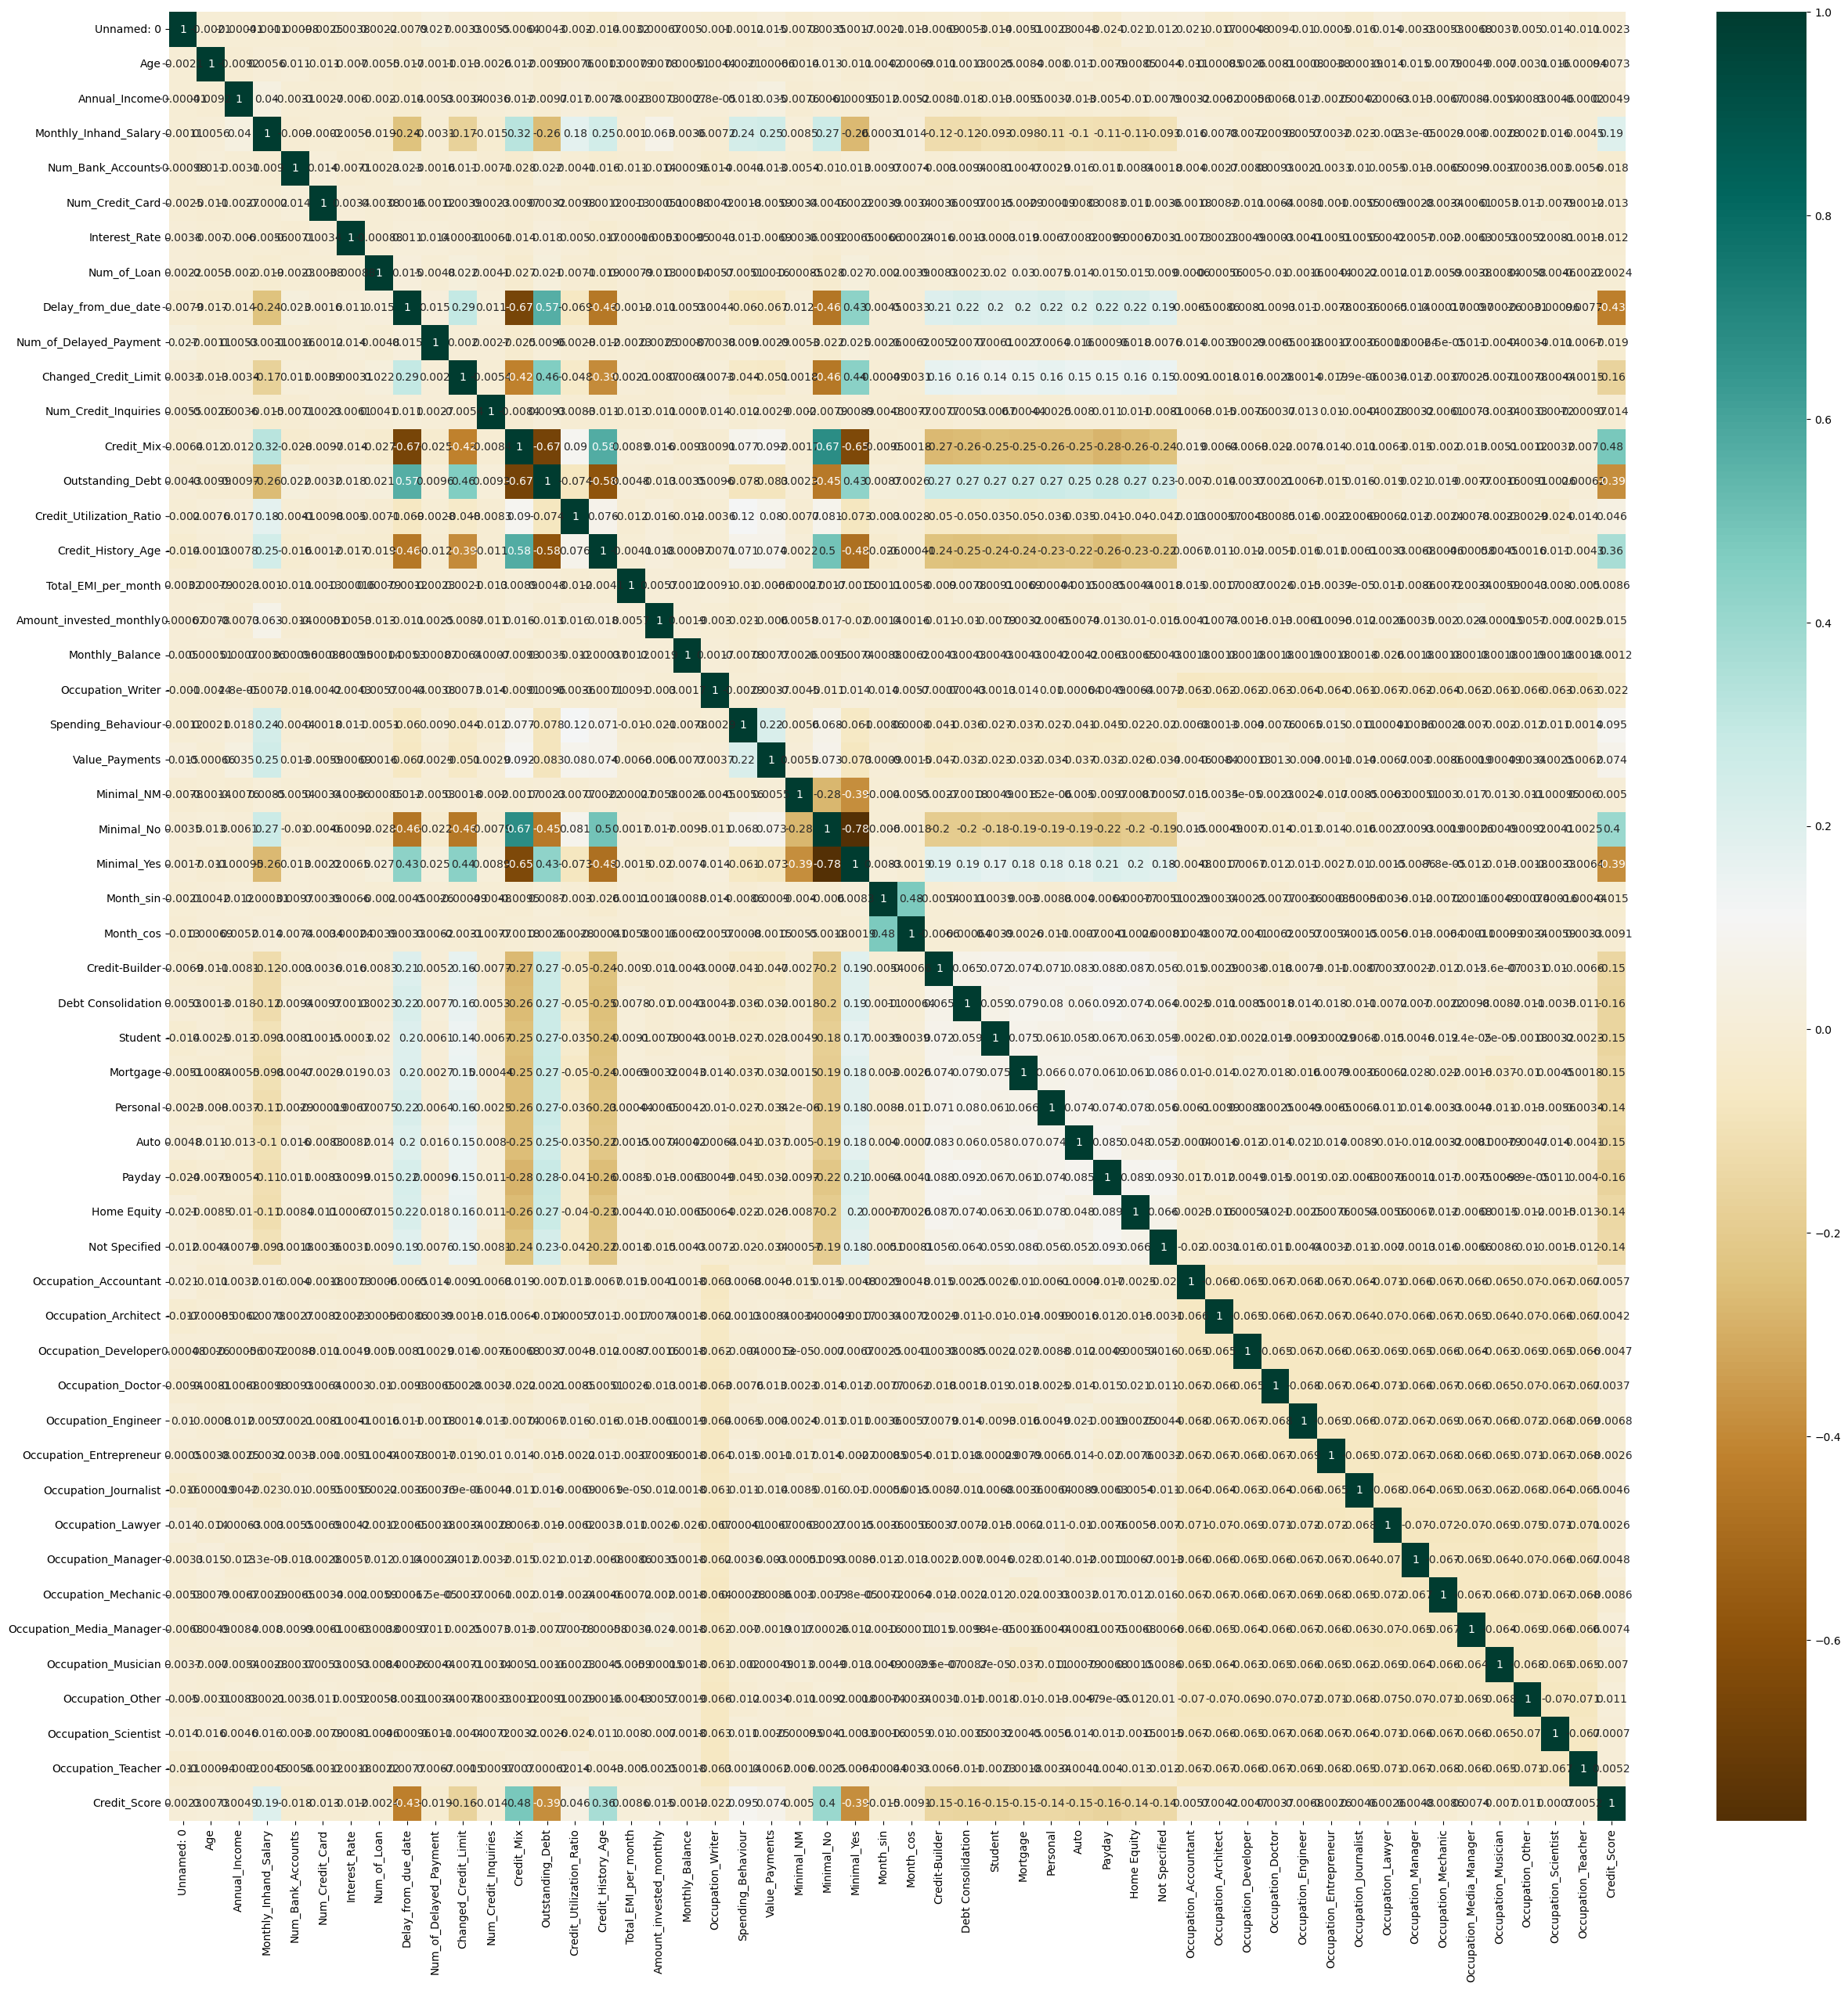

In [34]:
Train_na = fill_missing_values(Train_swaped)
corr_matrix = Train_na.corr("pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix,cmap="BrBG",annot=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Credit_Mix'}>],
       [<AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>],
       [<AxesSubplot:title={'center':'Amount_in

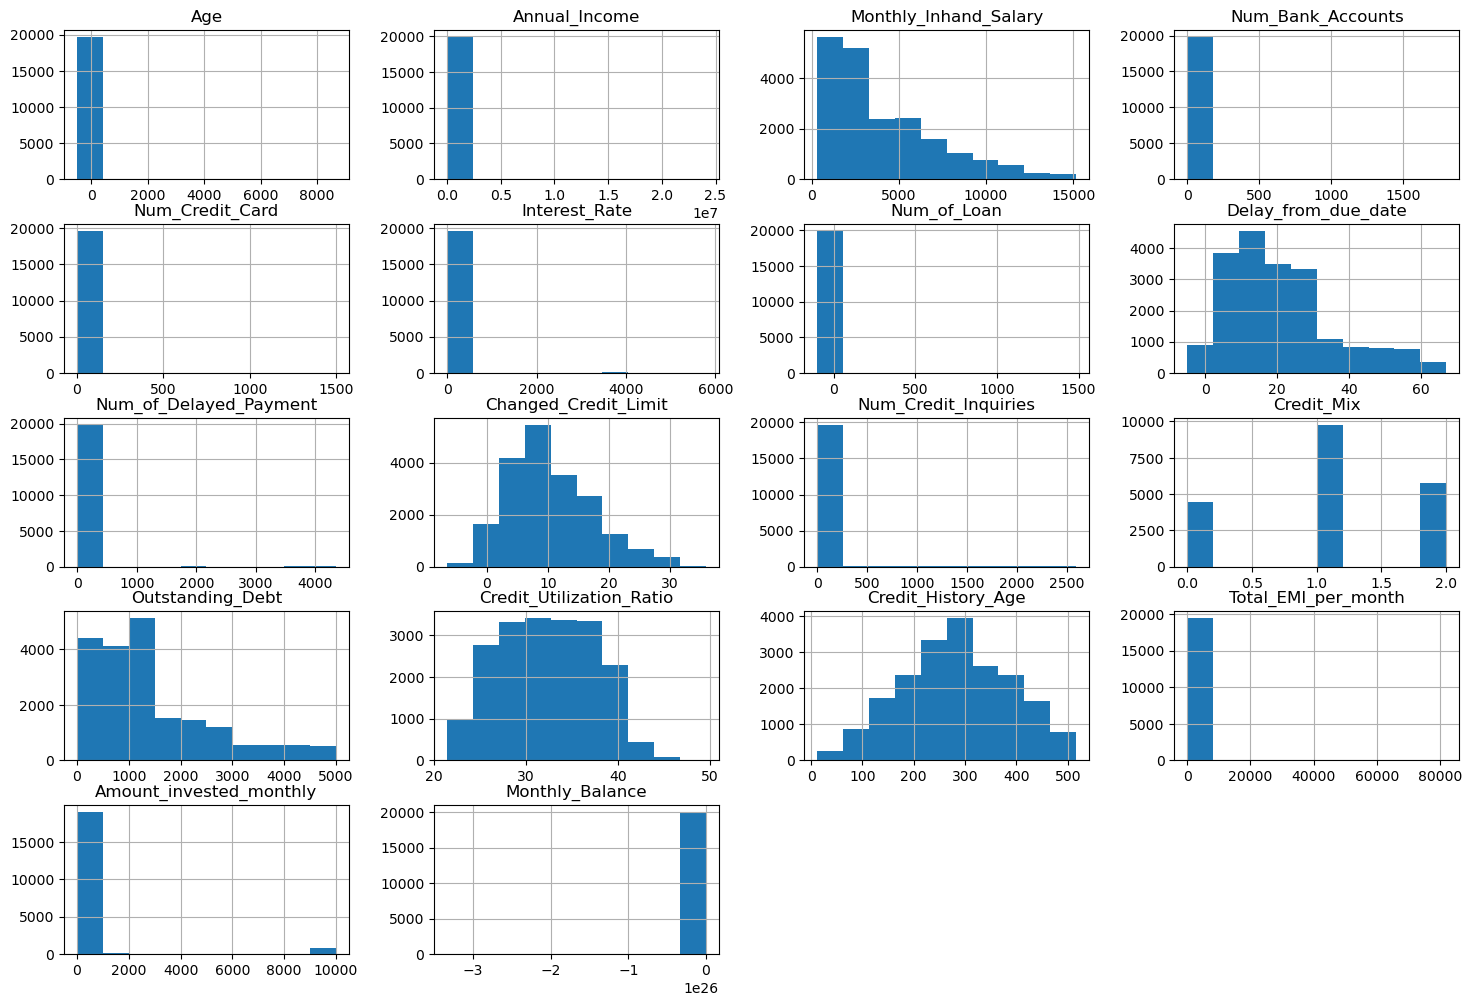

In [35]:
Train_na.loc[:,"Age":"Monthly_Balance"].hist(figsize = (18,12))


In [36]:
def outliers_agg(df):
  names = ["Age", "Annual_Income", "Num_Bank_Accounts", "Num_of_Delayed_Payment",
             "Monthly_Balance", "Num_Credit_Inquiries"]
  df_agg = df.copy()
  for i in names:
    upper_lim = Train_na[i].quantile(.98)
    lower_lim = Train_na[i].quantile(.02)
    df_agg[i] = np.where(df_agg[i] < lower_lim, lower_lim,
                   np.where(df_agg[i]>upper_lim, upper_lim,
                    df_agg[i]))
    
  names = ['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Total_EMI_per_month']  
  for i in names:
    upper_lim = Train_na[i].quantile(.96)
    lower_lim = Train_na[i].quantile(.04)
    df_agg[i] = np.where(df_agg[i] < lower_lim, lower_lim,
                   np.where(df_agg[i]>upper_lim, upper_lim,
                    df_agg[i]))
    
  
  upper_lim = Train_na['Amount_invested_monthly'].quantile(.955)
  lower_lim = Train_na['Amount_invested_monthly'].quantile(.045)
  df_agg['Amount_invested_monthly'] = np.where(df_agg['Amount_invested_monthly'] < lower_lim, lower_lim,
                   np.where(df_agg['Amount_invested_monthly']>upper_lim, upper_lim,
                    df_agg['Amount_invested_monthly']))

  return df_agg

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Credit_Mix'}>],
       [<AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>],
       [<AxesSubplot:title={'center':'Amount_in

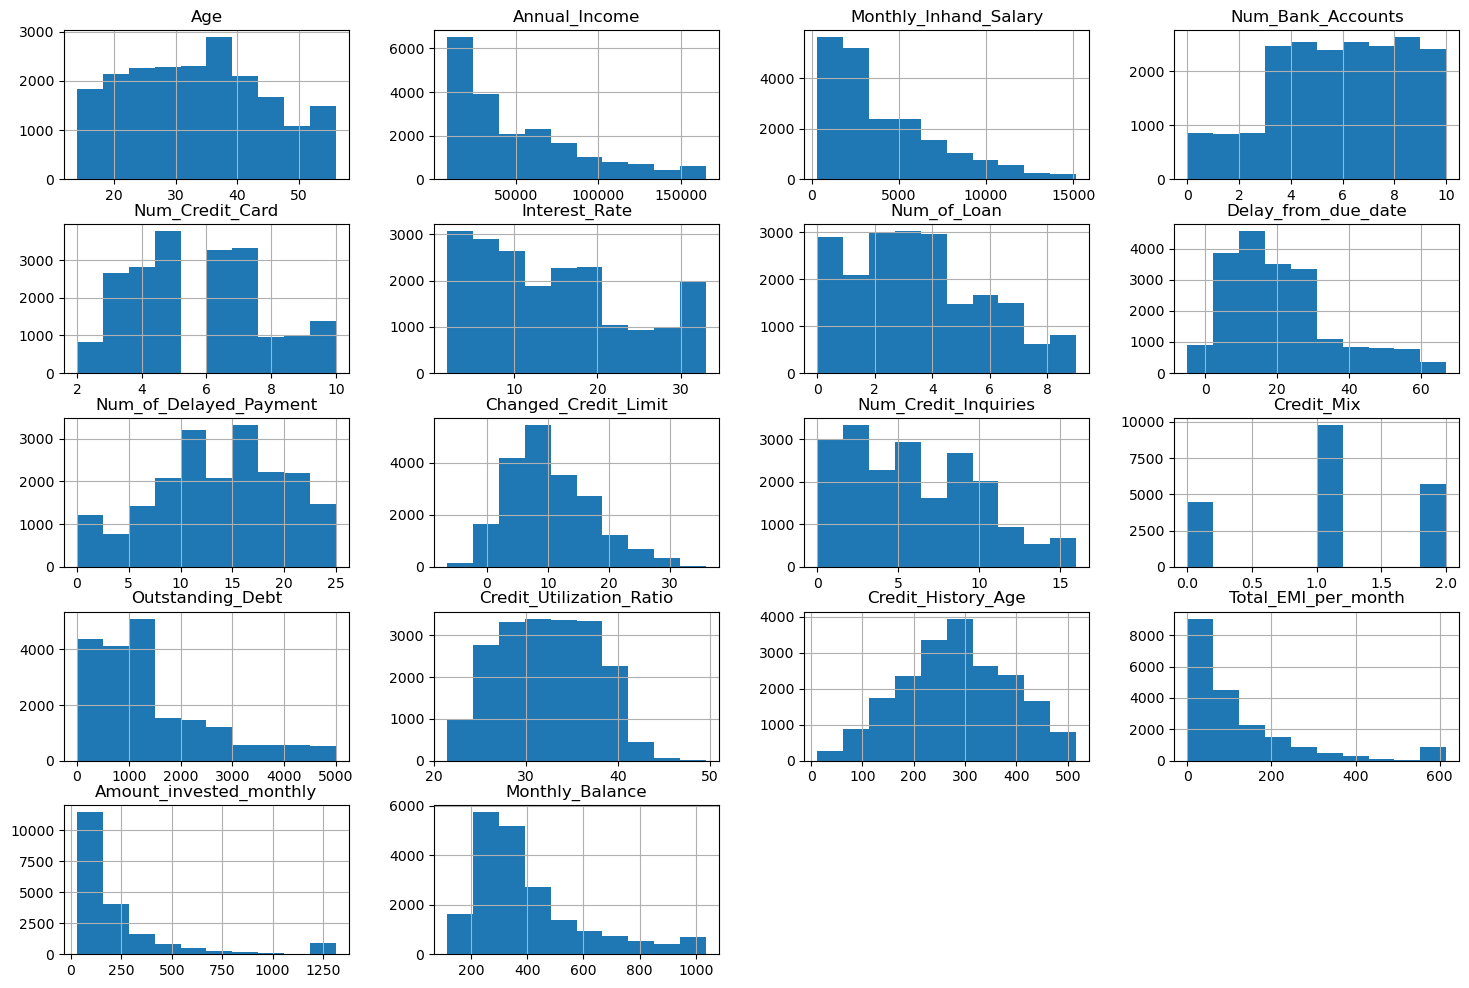

In [37]:
Train_outliers = outliers_agg(Train_na)
Train_outliers.loc[:,"Age":"Monthly_Balance"].hist(figsize = (18,12))

<Axes: >

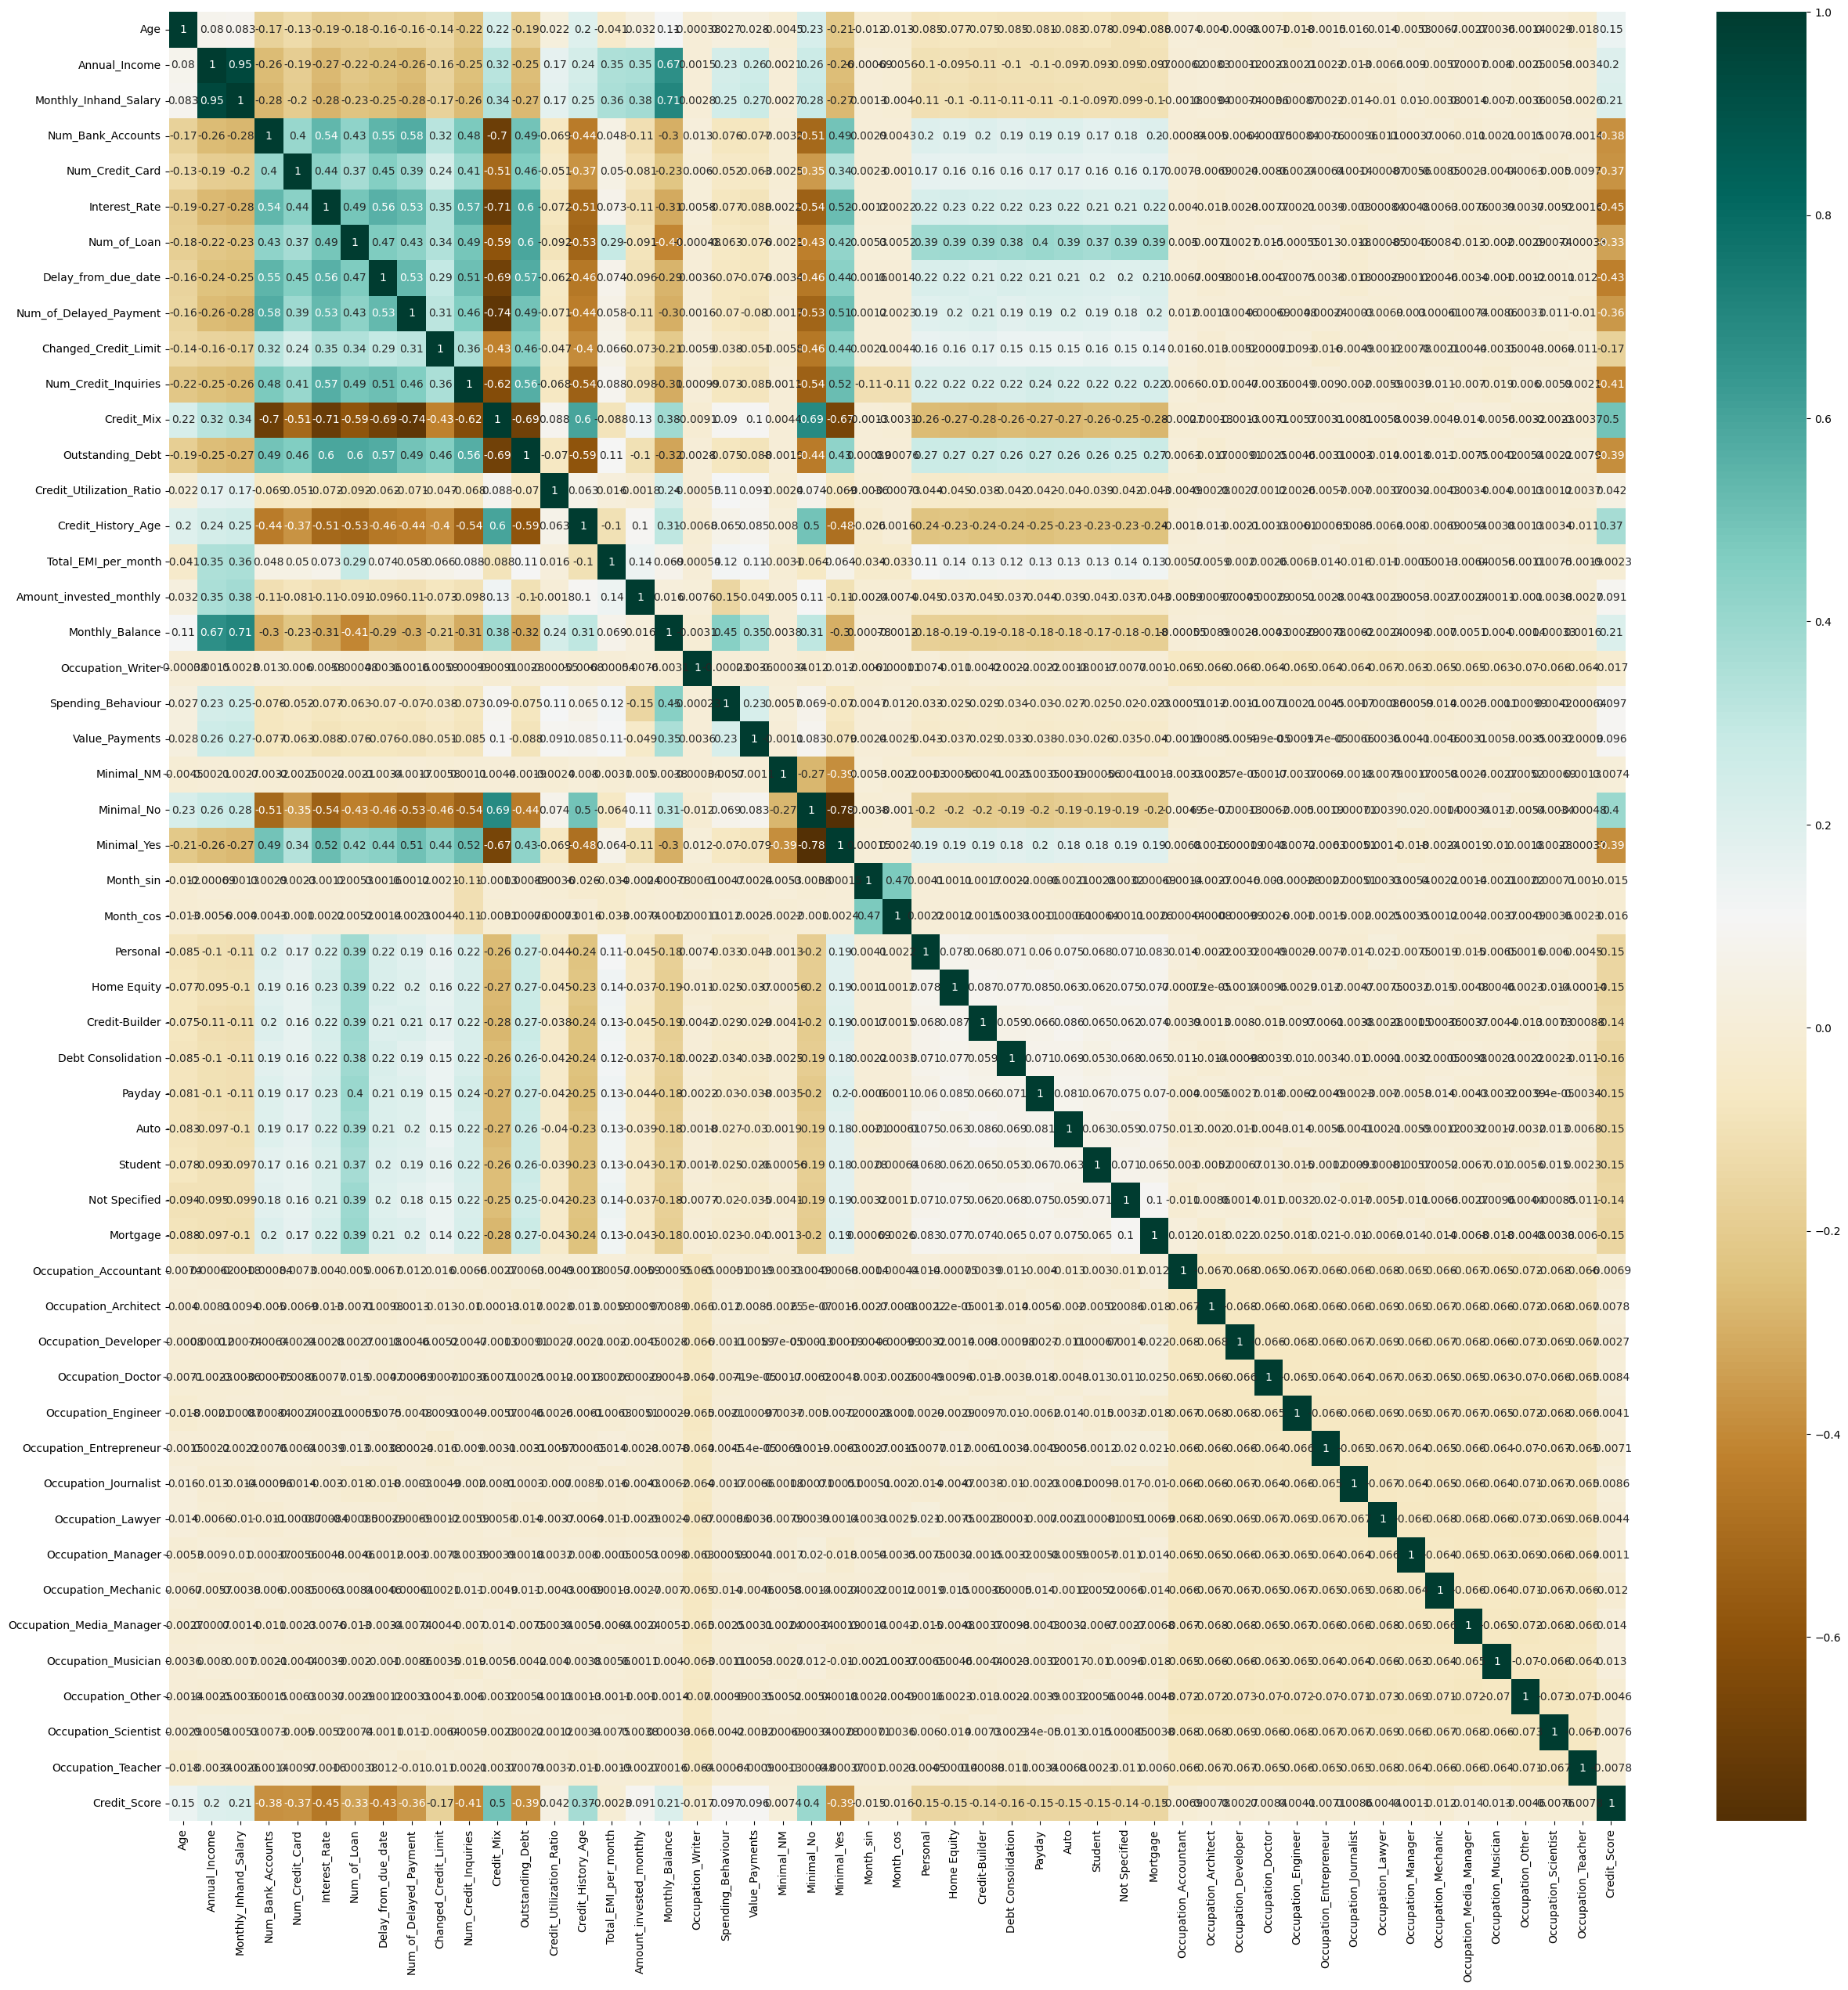

In [ ]:
corr_matrix_p = Train_outliers.corr("pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix_p,cmap="BrBG",annot=True)


Normalizacja

In [38]:
def normal(df):
  df_norm = df.copy()
  norm_col = df_norm.columns.values[:-1]
  scaler_norm = MinMaxScaler()
  for i in df_norm[norm_col]:
    scaler_norm.fit(Train_outliers[[i]])
    df_norm[i] = scaler_norm.transform(df_norm[[i]])

  return df_norm

In [39]:
Train_norm = normal(Train_outliers)
Train_norm.head()

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Other,Occupation_Scientist,Occupation_Teacher,Credit_Score
0,0.420823,0.214286,0.512976,0.457857,0.5,0.500,0.032258,0.111111,0.083333,0.32,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.718252,1.000000,0.506579,0.461701,0.0,0.000,0.000000,0.000000,0.097222,0.04,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.995360,0.738095,0.005859,0.032310,1.0,0.750,0.838710,0.777778,0.361111,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.478784,0.428571,0.057459,0.059117,1.0,0.750,0.677419,0.555556,0.402778,0.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.367331,0.476190,0.261105,0.264233,0.8,0.125,0.870968,0.666667,0.222222,0.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
def X_y_transform(df):
  y = pd.Series(df['Credit_Score'])
  X = df.drop(['Credit_Score'],axis=1)
  return X,y

In [41]:
X_train,y_train = X_y_transform(Train_norm)

In [ ]:
def auc_pred(X,y):
  target = label_binarize(y, classes=[0, 1, 2])
  model = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X, target)
  prob_test_vec = model.predict_proba(X)[::, 1]

 
  n_classes = 3
  fpr = [0] * 3
  tpr = [0] * 3
  thresholds = [0] * 3
  auc_score = [0] * 3
 
  for i in range(n_classes):
      fpr[i], tpr[i], thresholds[i] = roc_curve(target[:, i], prob_test_vec)
      auc_score[i] = auc(fpr[i], tpr[i])

  return 2 * (sum(auc_score) / n_classes) - 1

In [ ]:
names = X_train.columns.values
#nameses = X_train.columns.values[32:]

for i in names:
  print(i, auc_pred(pd.DataFrame(X_train[i]), y_train))

#print(nameses, auc_pred(pd.DataFrame(X_train[nameses]), y_train))

Age 0.016288044042869432
Annual_Income 0.02067365537473531
Monthly_Inhand_Salary 0.020774687618260623
Num_Bank_Accounts -0.04865015937847594
Num_Credit_Card 0.03551173867754032
Interest_Rate 0.04825626665162375
Num_of_Loan 0.02658281701096743
Delay_from_due_date 0.047886403371631525
Num_of_Delayed_Payment -0.05094668149720871
Changed_Credit_Limit -0.04399908605028802
Num_Credit_Inquiries 0.03461082412125083
Credit_Mix -0.0695459030973985
Outstanding_Debt 0.025041783117292438
Credit_Utilization_Ratio 0.00373240796973362
Credit_History_Age 0.03577426128437455
Total_EMI_per_month 0.0006128525794291129
Amount_invested_monthly -0.012858957966929485
Monthly_Balance 0.020070502735146656
Occupation_Writer -0.0018670870367135661
Spending_Behaviour 0.006480664599008756
Value_Payments 0.008223542609096635
Minimal_NM -0.0010461294376172825
Minimal_No -0.0526724523479426
Minimal_Yes -0.05371858178555999
Month_sin -0.005983465860092352
Month_cos -0.007416072776627813
Personal 0.011420045095700715
Ho

In [ ]:
#def drop_corr(df):
 # df_drop = df.copy()
  #df_drop = df_drop.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos'], axis = 1)
  #return df_drop

In [ ]:
#X_train = drop_corr(X_train)

In [ ]:
def data_preprocessing(X,y):
  df = create_df(X,y)
  df = drop_columns(df)
  df = clean_records(df)
  df = Credit_History_Age_trasform(df)
  df = colums_encoding(df)
  df = encoding_to_num(df)
  df = encoding_columns_2(df)
  df = occupation_agg(df)
  df = swap_columns(df, 'Credit_Score', 'Occupation_Writer')
  df = fill_missing_values(df)
  df = outliers_agg(df)
  df = normal(df)
  #df = drop_corr(df)

  return X_y_transform(df)

In [ ]:
X_test, y_test = data_preprocessing(X_test, y_test)

<ipython-input-140-0217aa377a1d>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


Modele

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.787125


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf_y_pred = sgd_clf.predict(X_test)
sgd_clf_accuracy = accuracy_score(y_test,sgd_clf_y_pred)
print("accuracy=",sgd_clf_accuracy)  

accuracy= 0.6510625


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn_y_pred = kn.predict(X_test)
kn_accuracy = accuracy_score(y_test,kn_y_pred)
print("accuracy=",kn_accuracy)  

accuracy= 0.65525


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_tree = DecisionTreeClassifier(random_state=1)
dt_tree.fit(X_train, y_train)
dt_tree_y_pred = dt_tree.predict(X_test)
dt_tree_accuracy = accuracy_score(y_test,dt_tree_y_pred)
print("accuracy=",dt_tree_accuracy)  

accuracy= 0.68525


In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Num_Bank_Accounts'], axis = 1)
X_test_drop = X_test_copy.drop(['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Num_Bank_Accounts'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7924375


In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes'], axis = 1)
X_test_drop = X_test_copy.drop(['Minimal_NM' ,'Minimal_No', 'Minimal_Yes'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.791625


In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Month_sin', 'Month_cos'], axis = 1)
X_test_drop = X_test_copy.drop(['Month_sin', 'Month_cos'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7885


In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy[X_train_copy.columns.drop(list(X_train_copy.filter(regex='Occupation')))]
X_test_drop = X_test_copy[X_test_copy.columns.drop(list(X_test_copy.filter(regex='Occupation')))]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.784625


In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos'], axis = 1)
X_test_drop = X_test_copy.drop(['Minimal_NM' ,'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos',], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.795375
